# Project 4 Intro to Machine Learning - Identify Fraud from Enron Email - Nitin Ramchand Lalwani

__Question 1: Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?__

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. In this project, we will play detective by building a person of interest (POI) identifier based on financial and email data made public as a result of the Enron scandal.

The objective in this project is to build a supervised classification identified which can identify Person of Interests by combing email and financial data that we have. The dataset that we have to manipulate is very limited since it we only have information available about 146 people. Moreover, we have a very inbalanced dataset regarding person of interest since out of these 146 people only 18 are identified as people of interest. 

Furthermore we don't have complete information about all the other features to begin with. The following dictionary shows the ratio out of 1 of information that we have per feature. 

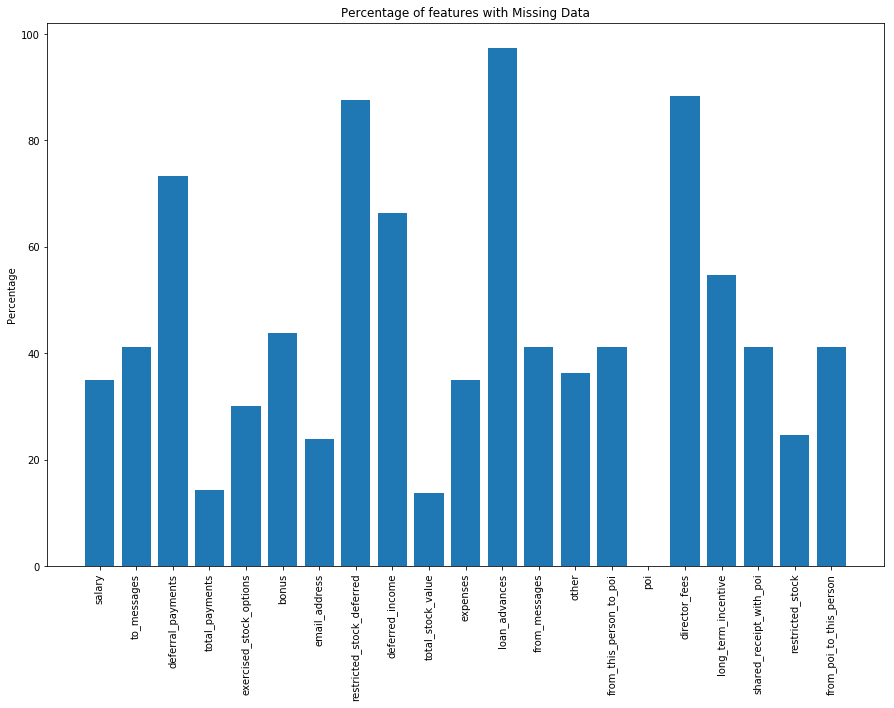

In [7]:
populated_data_percentage = {'bonus': 0.5616,
 'deferral_payments': 0.2671,
 'deferred_income': 0.3356,
 'director_fees': 0.1164,
 'email_address': 0.7603,
 'exercised_stock_options': 0.6986,
 'expenses': 0.6507,
 'from_messages': 0.589,
 'from_poi_to_this_person': 0.589,
 'from_this_person_to_poi': 0.589,
 'loan_advances': 0.0274,
 'long_term_incentive': 0.4521,
 'other': 0.637,
 'poi': 1.0,
 'restricted_stock': 0.7534,
 'restricted_stock_deferred': 0.1233,
 'salary': 0.6507,
 'shared_receipt_with_poi': 0.589,
 'to_messages': 0.589,
 'total_payments': 0.8562,
 'total_stock_value': 0.863}
populated_data_percentage = {key: (1-value) * 100 for key, value in populated_data_percentage.items()}
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.bar(*zip(*populated_data_percentage.items()))
plt.xticks(rotation='vertical')
plt.ylabel('Percentage')
plt.title('Percentage of features with Missing Data')
plt.show()


Out of the 146 data points, two outliers were found: <br>
1) 'TOTAL' was found by performing boxplots and seeing that there is a value with very high numbers that was suspicous. <br>
2) 'THE TRAVEL AGENCY IN THE PARK' was also removed since most of the features of this point are NaN which led to being an useless datapoint for this study. 

__Question 2: What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not?__

Considering that initially not all features had a lot of information behind, the first threshold that was taken is that only features containing at least 50% of information will be looked into.

Next, some new features were created and the final score of all of these were looked at to identify what could be interesting features. The features and their scores around found below. 

(24.815079733218194, 'exercised_stock_options'),<br>
 (24.18289867856688, 'total_stock_value'),<br>
 (20.792252047181535, 'bonus'), <br>
 (18.289684043404513, 'salary'),<br>
 (16.40971254803579, 'fraction_from_this_person_to_poi'),<br>
 (11.458476579280369, 'deferred_income'),<br>
 (10.783584708160824, 'ratio_bonus_salary'),<br>
 (9.922186013189823, 'long_term_incentive'),<br>
 (9.2128106219771, 'restricted_stock'),<br>
 (9.101268739193504, 'fraction_shared_receipt_with_poi'),<br>
 (8.772777730091676, 'total_payments'),<br>
 (8.589420731682381, 'shared_receipt_with_poi'),<br>
 (7.9566807742719305, 'ratio_deferred_income_salary'),<br>
 (6.094173310638945, 'expenses'),<br>
 (5.243449713374958, 'from_poi_to_this_person'),<br>
 (4.187477506995375, 'other'),<br>
 (3.128091748156719, 'fraction_to_this_person_from_poi'),<br>
 (2.382612108227674, 'from_this_person_to_poi'),<br>
 (1.6463411294420076, 'to_messages'),<br>
 (0.16970094762175533, 'from_messages'),<br>
 (0.14466357099326568, 'ratio_other_salary'),<br>
 (0.12256559657101494, 'ratio_expenses_salary'),<br>
 (0.1215495441667777, 'ratio_restricted_stock_salary'),<br>
 (0.11930387004725279, 'ratio_exercised_stock_options_salary'),<br>
 (0.11734794231732279, 'ratio_total_stock_value_salary'),<br>
 (0.08843733817029859, 'ratio_long_term_incentive_salary'),<br>
 (0.052697685978330605, 'ratio_total_payments_salary')

A lot of the above features are ones that have been created in order to look at their scores. Mostly for the financial features new features which consistent of a financial feature ratio to the salary was created but we can see that all of these have very low ratio except for bonu/salary ratio. however bonus and salary by themselves have higher ratio therefore non of the financial new features tested are included.

With respect to the email features, ratios of:<br>
__fraction_from_this_person_to_poi__ = from_this_person_to_poi/from_messages <br>
__fraction_shared_receipt_with_poi__ = shared_receipt_with_poi/to_messages <br>
both have better score than the features by themselves and they seem to be interesting features since more than the absolute value of emails received or sent, it seems interesting to look at what ratio are sent to POIs or shared with POIs. 

(24.815079733218194, 'exercised_stock_options'), <br>
 (24.18289867856688, 'total_stock_value'),<br>
 (20.792252047181535, 'bonus'),<br>
 (18.289684043404513, 'salary'),<br>
 (16.40971254803579, 'fraction_from_this_person_to_poi'),<br>
 (11.458476579280369, 'deferred_income'),<br>
 (9.922186013189823, 'long_term_incentive'),<br>
 (9.2128106219771, 'restricted_stock'),<br>
 (9.101268739193504, 'fraction_shared_receipt_with_poi'),<br>
 (8.772777730091676, 'total_payments'),<br>
 (8.589420731682381, 'shared_receipt_with_poi'),<br>
 (7.184055658288725, 'loan_advances'),<br>
 (6.094173310638945, 'expenses'),<br>
 (5.243449713374958, 'from_poi_to_this_person'),<br>
 (4.187477506995375, 'other'),<br>
 (2.382612108227674, 'from_this_person_to_poi'),<br>
 (2.1263278020077054, 'director_fees'),<br>
 (1.6463411294420076, 'to_messages'),<br>
 (0.2246112747360099, 'deferral_payments'),<br>
 (0.16970094762175533, 'from_messages'),<br>
 (0.06549965290994214, 'restricted_stock_deferred')

Here are the scores of the algorithms when with the two new features and without them and this shows that all algorithms have a better f1 score when taking into account the features than not.

In [3]:
import pandas as pd
df_new_features = pd.DataFrame(0, index=['Gaussian NB without New Features', 'Gaussian NB with New Features', 'KNN without New Features', 'KNN with New Features','DT without New Features', 'DT with New Features'], columns=['accuracy_score','precision','recall','f1_score'])
df_new_features.loc['Gaussian NB without New Features', 'accuracy_score'] = 0.850930
df_new_features.loc['Gaussian NB with New Features', 'accuracy_score'] = 0.851860
df_new_features.loc['Gaussian NB without New Features', 'precision'] =0.365545
df_new_features.loc['Gaussian NB with New Features', 'precision'] =0.368295
df_new_features.loc['Gaussian NB without New Features', 'recall'] =0.352000
df_new_features.loc['Gaussian NB with New Features', 'recall'] =0.352000
df_new_features.loc['Gaussian NB without New Features', 'f1_score'] =0.341908
df_new_features.loc['Gaussian NB with New Features', 'f1_score'] =0.343345
df_new_features.loc['KNN without New Features', 'accuracy_score'] = 0.819302
df_new_features.loc['KNN with New Features', 'accuracy_score'] = 0.819302
df_new_features.loc['KNN without New Features', 'precision'] =0.24622
df_new_features.loc['KNN with New Features', 'precision'] =0.257067
df_new_features.loc['KNN without New Features', 'recall'] =0.268000
df_new_features.loc['KNN with New Features', 'recall'] =0.250000
df_new_features.loc['KNN without New Features', 'f1_score'] =0.249170
df_new_features.loc['KNN with New Features', 'f1_score'] =0.240308
df_new_features.loc['DT without New Features', 'accuracy_score'] = 0.820930
df_new_features.loc['DT with New Features', 'accuracy_score'] = 0.835349
df_new_features.loc['DT without New Features', 'precision'] =0.290714
df_new_features.loc['DT with New Features', 'precision'] =0.316920
df_new_features.loc['DT without New Features', 'recall'] =0.312000
df_new_features.loc['DT with New Features', 'recall'] =0.310000
df_new_features.loc['DT without New Features', 'f1_score'] =0.287787
df_new_features.loc['DT with New Features', 'f1_score'] =0.291958
df_new_features

,accuracy_score,precision,recall,f1_score
Gaussian NB without New Features,0.850930,0.365545,0.352,0.341908
Gaussian NB with New Features,0.851860,0.368295,0.352,0.343345
KNN without New Features,0.819302,0.246220,0.268,0.249170
KNN with New Features,0.819302,0.257067,0.250,0.240308
DT without New Features,0.820930,0.290714,0.312,0.287787
DT with New Features,0.835349,0.316920,0.310,0.291958


In order to understand what was the best number of features to be used, the SelectKBest method was used. Below is a graph showing how varying the best number of features used varies the f1score. The optimal occurs for around 10  features (including the newly created ones described above) using the Gaussian NB algorithm. This SelectKBest method is implemented in the pipeline used when optimizing the f1 score in our algorithm which is shown on the 'poi_id.py' file.

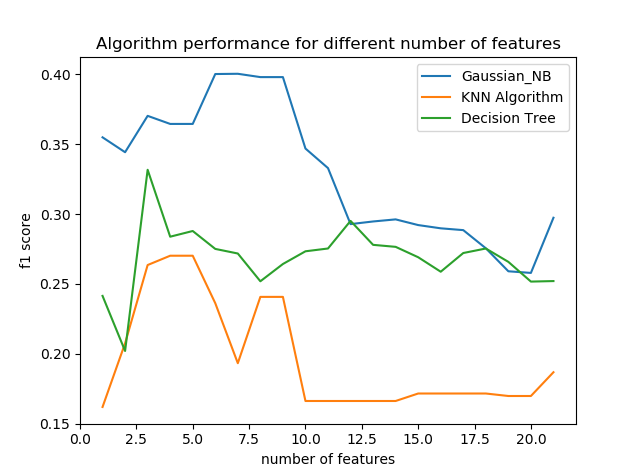

In [4]:
from IPython.display import Image
Image("NumFeaturesvsF1Score.png")

With respecting to scalling, for the Gaussian Naive Bayes Classifier implemnented we will see that using Principal Component Analysis for scalling gives worst overall scores (precision, recall and F1 score) however when testing the K Nearest Neighbour algorithm we use the MinMaxScaler in order to normalize the distance of the features to the neighbours.

Furthermore, to understand how many features to use the following graph shows us how the algorithms used, how the f1 score varies with the total number of features used.

__Question 3: What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?__

In [5]:
df_new_features['f1_score'].idxmax()

'Gaussian NB with New Features'

In [6]:
df_new_features.loc[df_new_features['f1_score'].idxmax(),'f1_score']

0.343345

I ended up choosing the __Gaussian Naive  Bayes Classifier__ since it gave me the best result with respect to the __F1 score = 0.343__. This F1 score is a harmonic mean of both the precision and recall which are the evaluation metrics that will be interesting for this project. This F1 score is a measure of a test's accuracy.

I also tested out two other alogirthms namely the K Nearest Neighbour (KNN) algorithm which gave a F1 score of 0.240; and the Decision Tree Classifier gave a F1 score of 0.305. It is true that for the Decision Tree a lof of parameter tuning that could be performed but the difference between the F1 score with the Gaussian Naive Bayes Classifier was big enough to select it for this project.

__Question 4: What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).__

Indeed the Gaussian NB algorithm does not have parameters to tune but when having implemented the KNN and the Decision Tree algorithms, I conducted parameter tuning. What the parameter tuninig does, is to adjust some parameters when the algorithm is being trained. This will add bias in the algorithm allowing us to get better scores on prediction on the test set but it is also dangerous since when we want to implement the algorithm for new datasets we don't know if we have added too much bias.  

Particular the parameters that I tuned for the algorithms tested were: 

__K Nearest Neighbour:__ 
> - the number of neighbours that will be used in the classifier (1 was the optimal in my simulation) <br>

__Decision Tree Classifier:__ 
>- criterion : The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
>- max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
>- min_samples_spli: The minimum number of samples required to split an internal node.
>- There are also several other parameters that can be tuned with this algorithm (e.g. max_features, min_samples_leaf)

__Question 5: What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?__

In machine learning, model validation is referred to as the process where a trained model is evaluated with a testing data set. The testing data set is a separate portion of the same data set from which the training set is derived. The main purpose of using the testing data set is to test the generalization ability of a trained model

Cross Validation in machine learniing, is a validation technique where the training data is split into groups and then part of the training data is put out and the then performance is caluclated before removing another splif of the training data and doing the same. The procedure is repeated until all splits have been out and the average performance is caluclated. In this way, all the data from our training set is used both to train and to validate. Even if cross validation is a very useful tool to estimate the performance of the method, the best way is to then test the algorithm with an external test set which has never been used to measure the performance of the algorithm. A classical mistake that I went through is that I overfitting the model so that it performs well on the training set but not on the test set.

In order to overcome this we use a cross validation technique. The data available that we had was very limited with only 146 records from which 18 were identified as POIs which means that it is a very unbalanaced dataset. This makes using the Stratisfied Shuffle Split method ideal for with this method it splits (100 specifically) the dataset into training and test sets all containing the same proportion of POIs to non POIs. In particular since we used test set to be 30% of the total dataset it meant that the test set had 5 POis and 13 POIs in the training set for all 100 splits.



__Question 6: Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance.__

The two evaluation metrics used that make sense for the project are precision and recall. The reason why accuracy is not a very good evaulation metric is because we have a very unbalanced data set which means that everytime we predict that a non POI is a nonPOI it will make the accuracy of the algorithm better but this is not what we are interested in. 

The __precision__ tries to answer the following question:

What proporton of positive identification was actually correct 

$Precision = \frac{TP}{TP + FP}$ where TP is True Positives and FP is False positives. 

This precision metric might be interesting to optimize when we are interesting in trying to optimize the efficiency at which POIs are identified correctly. So for example it may be useful in case we are sending all those identified as POIs to jail since we don't want to have a high number of non POIs put unfairly in jail.

In other words, the precision is a metric that measures the percentage of correctly classified POIs that the algorithm identifies as POIs

The __recall__ tries to answer the following question:

What proportion of actual positives was identified correctly. 

$Recall = \frac{TP}{TP + FN}$ where TP is True Positives and FN is False negatives.

The recall in contrast is the percetage of identified POIs out of the ones that are actually POIs. So for example this may be interesting to optimze if we are relying in our algorithm to catch as many POIs as possible. If we were using this algorithm to interrogate many people as possible with the accepted drawback of having many non POIs interoggated as long as they are then freed once investigated.

The following scores were obtained for the Gaussian Naive Bayes Classifier chosen for this project. <br> Precision = 0.368, Recall = 0.352, Accuracy = 0.852, F1 Score = 0.343



### References

https://link.springer.com/referenceworkentry/10.1007%2F978-1-4419-9863-7_233 <br>
https://scikit-learn.org <br>
https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall